# MABSim and SMPyBandits

## Comparing Multiple Algorithms

In this notebook, we use SMPyBandits as the base library for MAB implementartion.

In [1]:
# Dépendances
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#Arms
from SMPyBandits.Arms import Bernoulli, Gaussian, Constant

#Policies
from SMPyBandits.Policies import Uniform, EmpiricalMeans, EpsilonGreedy, UCBalpha, klUCB, Thompson, SoftMix

#Sim
from mabsim import mabs, create_widget

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


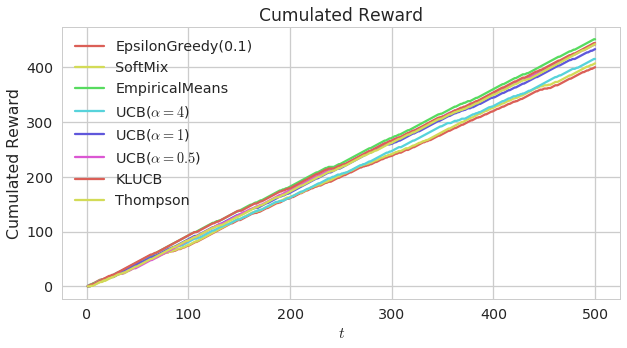

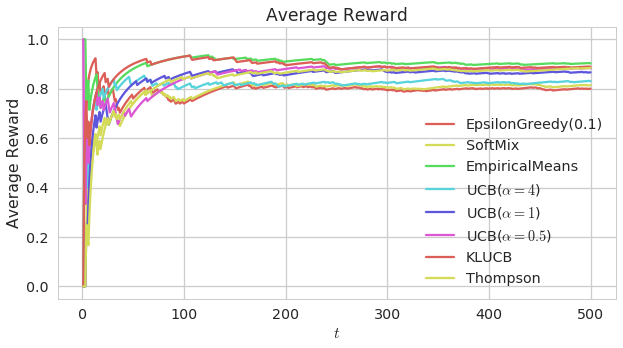

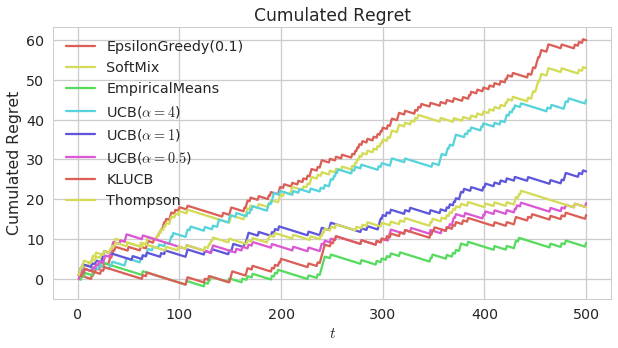

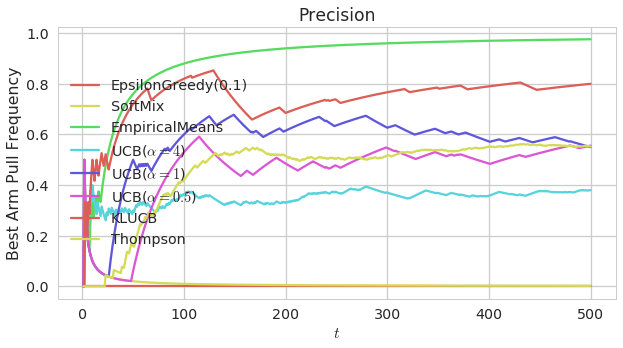

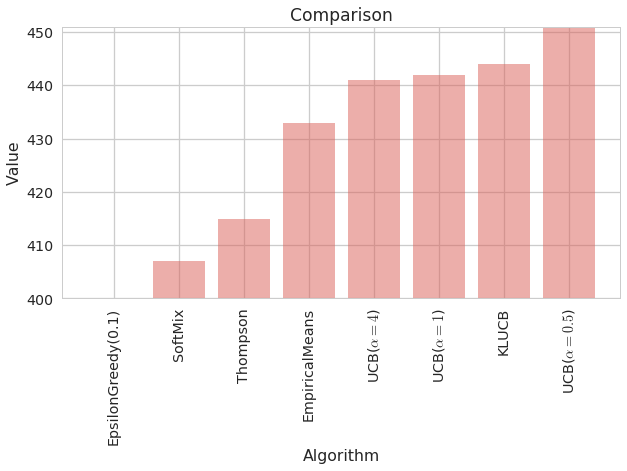

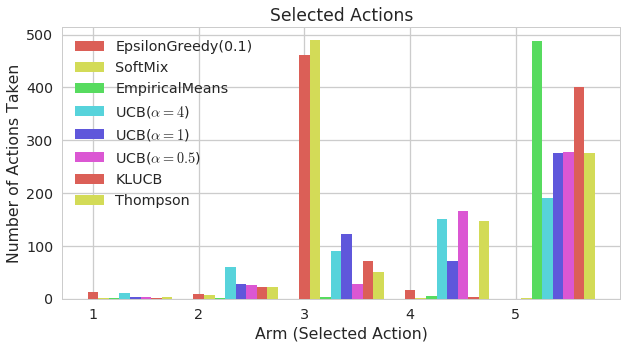

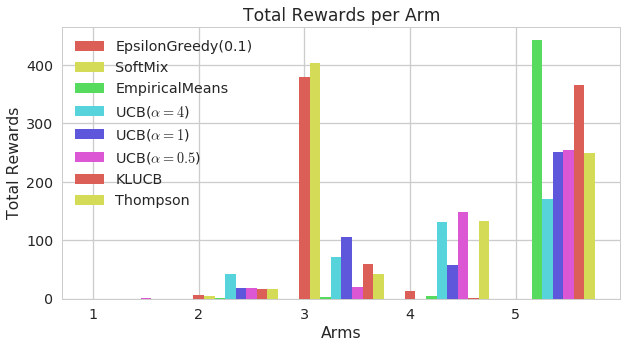

In [2]:
plt.rcParams['figure.figsize'] = (10, 5)

#MAB parameters
means = np.array([0.1, 0.7, 0.8, 0.9, 0.92])
k = len(means)

#arms objects
A = [Bernoulli(m) for m in means]

#algorithms
G = [EpsilonGreedy(k, epsilon=0.1), SoftMix(k), EmpiricalMeans(k),
     UCBalpha(k, alpha=4), UCBalpha(k, alpha=1), UCBalpha(k, alpha=0.5),
     klUCB(k), Thompson(k)]

#time-horizon
tau = 500

M = mabs(A, G, tau, repetitions=1)
M.run(tqdm_leave=True)

M.plot_cumulated_reward_progression()
M.plot_average_reward_progression()
M.plot_cumulated_regret_progression()
M.plot_precision_progression()
M.plot_comp_algs()

M.plot_comp_arm_count()
M.plot_comp_arm_rewards()